# ESTE ES EL NOTEBOOK DEL TFM

## Importar librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
import re

import missingno as msno
import sys
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

c:\Users\JAIME\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [14]:
def read_file(ruta_completa):
    try:
        file, extension = os.path.splitext(ruta_completa.lower())

        if extension == '.csv':
            df = pd.read_csv(ruta_completa)
        elif extension == '.parquet':
            df = pd.read_parquet(ruta_completa)
        elif extension == '.xlsx' or extension == 'xls':
            df =pd.read_excel(ruta_completa)
        
        return df
    
    except FileNotFoundError:
        print(f"Error: Archivo no encontrado en la ruta '{ruta_completa}'.")
        return None

    except Exception as e:
        print(f"Error inesperado: {e}")
        return None


In [84]:
def initial_exploration(df):
    print('El número de filas y columnas es:')
    display(df.shape)

    print('Primeras cinco filas:\n')
    display(df.head(5))

    print('Últimas cinco filas:\n')
    display(df.tail(5))

    print('Muestra aleatoria de filas:\n')
    display(df.sample(5))

    print('Las columnas del conjunto de datos son:')
    display(df.columns)

    print('Tipo de datos por columna:')
    display(df.dtypes)

    print('Número de columnas por tipo de datos:')
    display(df.dtypes.value_counts())

    print('Información más detallada:\n')
    display(df.info())
    display(df.describe())

    print('Número de valores únicos:')
    display(df.nunique())

    print('Valores únicos:\n')
    df_unique_values = pd.DataFrame(df.apply(lambda x: x.unique()))
    display(df_unique_values)

    print('Número de duplicados por columna:')
    df_duplicated = pd.DataFrame(df.apply(lambda x: x.duplicated()).sum().reset_index().rename(columns = {'index': 'Col', 0: 'Duplicates'}))
    df_duplicated = df_duplicated.sort_values(by = 'Duplicates', ascending = False).reset_index(drop=True)
    display(df_duplicated)

    print('Número de valores nulos por columna:')
    display(df.isnull().sum().reset_index().rename(columns = {'index': 'Col', 0: 'pct'}))
    
    print('Porcentaje de valores nulos por columna:')
    display(df.isnull().mean().mul(100).round(2).sort_values(ascending = False).reset_index(drop=True))

    print("## Valores nulos: Visualización")
    msno.bar(df, figsize = (6, 3), fontsize= 9)
    plt.show()
    print('-' * 100)

    print("## Visualización de patrones en valores nulos")
    msno.matrix(df, figsize = (6, 3), fontsize= 9, sparkline = False)
    plt.show()
    print('-' * 100)

    msno.heatmap(df, figsize = (6, 3), fontsize= 9)
    plt.show()
    print('-' * 100)

## Cargar datos

In [16]:
ruta = r'C:\Users\JAIME\Documents\GitHub\TFM-Sesgos-en-el-sistema-judicial-de-EEUU-\00_Data\00_Raw'

lista_ficheros = os.listdir(ruta)


In [17]:
dict_datos = {}

for fichero in lista_ficheros:
    ruta_completa = os.path.join(ruta, fichero)
    df = read_file(ruta_completa)
    clave = os.path.splitext(fichero.replace('-', '_'))[0]
    dict_datos[clave] = df

dict_datos.keys()

dict_keys(['compas_scores_raw', 'compas_scores_two_years'])

In [87]:
df['two_year_recid'].unique()

array([0, 1], dtype=int64)

El número de filas y columnas es:


(7214, 53)

Primeras cinco filas:



,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


Últimas cinco filas:



,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0
7213,11001,florencia sanmartin,florencia,sanmartin,2014-06-30,Female,1992-12-18,23,Less than 25,Hispanic,...,4,Low,2014-06-30,2015-03-15,2015-03-15,2,0,258,0,1


Muestra aleatoria de filas:



,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
335,499,justin knoll,justin,knoll,2014-03-03,Male,1988-02-24,28,25 - 45,Caucasian,...,3,Low,2014-03-03,2014-07-16,2014-07-17,1,0,135,0,0
1819,2758,jerome traverso,jerome,traverso,2013-09-18,Male,1991-04-06,25,25 - 45,African-American,...,4,Low,2013-09-18,2013-09-17,2013-09-18,0,0,926,0,0
2311,3519,anthony irby,anthony,irby,2013-09-09,Male,1970-01-05,46,Greater than 45,African-American,...,3,Low,2013-09-09,2016-01-13,2016-01-22,8,0,4,1,1
6179,9419,bienvenido valoy,bienvenido,valoy,2014-10-08,Male,1971-01-25,45,Greater than 45,African-American,...,1,Low,2014-10-08,2015-06-18,2015-06-19,0,1,253,0,1
1074,1648,lonny paul,lonny,paul,2013-11-16,Male,1966-12-21,49,Greater than 45,Caucasian,...,1,Low,2013-11-16,2013-11-16,2013-11-16,0,0,867,0,0


Las columnas del conjunto de datos son:


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

Tipo de datos por columna:


id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date      

Número de columnas por tipo de datos:


object     33
int64      16
float64     4
Name: count, dtype: int64

Información más detallada:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 

None

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


Número de valores únicos:


id                         7214
name                       7158
first                      2800
last                       3950
compas_screening_date       690
sex                           2
dob                        5452
age                          65
age_cat                       3
race                          6
juv_fel_count                11
decile_score                 10
juv_misd_count               10
juv_other_count              10
priors_count                 37
days_b_screening_arrest     423
c_jail_in                  6907
c_jail_out                 6880
c_case_number              7192
c_offense_date              927
c_arrest_date               580
c_days_from_compas          499
c_charge_degree               2
c_charge_desc               437
is_recid                      2
r_case_number              3471
r_charge_degree              10
r_days_from_arrest          201
r_offense_date             1075
r_charge_desc               340
r_jail_in                   972
r_jail_o

Valores únicos:



,0
id,"[1, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 1..."
name,"[miguel hernandez, kevon dixon, ed philo, marc..."
first,"[miguel, kevon, ed, marcu, bouthy, marsha, edw..."
last,"[hernandez, dixon, philo, brown, pierrelouis, ..."
compas_screening_date,"[2013-08-14, 2013-01-27, 2013-04-14, 2013-01-1..."
sex,"[Male, Female]"
dob,"[1947-04-18, 1982-01-22, 1991-05-14, 1993-01-2..."
age,"[69, 34, 24, 23, 43, 44, 41, 39, 21, 27, 37, 4..."
age_cat,"[Greater than 45, 25 - 45, Less than 25]"
race,"[Other, African-American, Caucasian, Hispanic,..."


Número de duplicados por columna:


,Col,Duplicates
0,v_type_of_assessment,7213
1,violent_recid,7213
2,type_of_assessment,7213
3,two_year_recid,7212
4,is_violent_recid,7212
5,c_charge_degree,7212
6,is_recid,7212
7,sex,7212
8,event,7212
9,score_text,7211


Número de valores nulos por columna:


,Col,pct
0,id,0
1,name,0
2,first,0
3,last,0
4,compas_screening_date,0
5,sex,0
6,dob,0
7,age,0
8,age_cat,0
9,race,0


Porcentaje de valores nulos por columna:


0     100.00
1      88.65
2      88.65
3      88.65
4      88.65
5      84.24
6      67.90
7      67.90
8      67.90
9      52.69
10     51.89
11     51.89
12     51.89
13     16.07
14      4.26
15      4.26
16      4.26
17      3.27
18      3.27
19      0.40
20      0.30
21      0.30
22      0.00
23      0.00
24      0.00
25      0.00
26      0.00
27      0.00
28      0.00
29      0.00
30      0.00
31      0.00
32      0.00
33      0.00
34      0.00
35      0.00
36      0.00
37      0.00
38      0.00
39      0.00
40      0.00
41      0.00
42      0.00
43      0.00
44      0.00
45      0.00
46      0.00
47      0.00
48      0.00
49      0.00
50      0.00
51      0.00
52      0.00
dtype: float64

## Valores nulos: Visualización


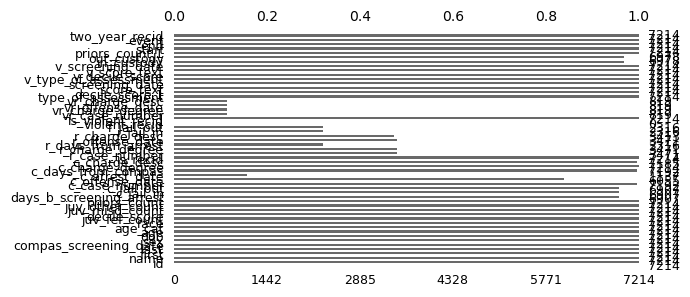

----------------------------------------------------------------------------------------------------
## Visualización de patrones en valores nulos


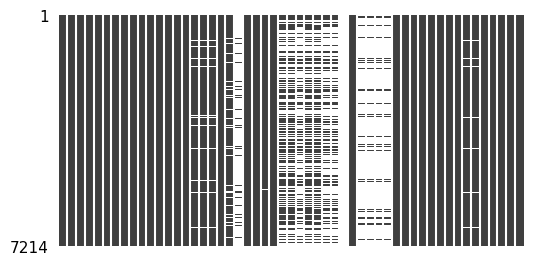

----------------------------------------------------------------------------------------------------


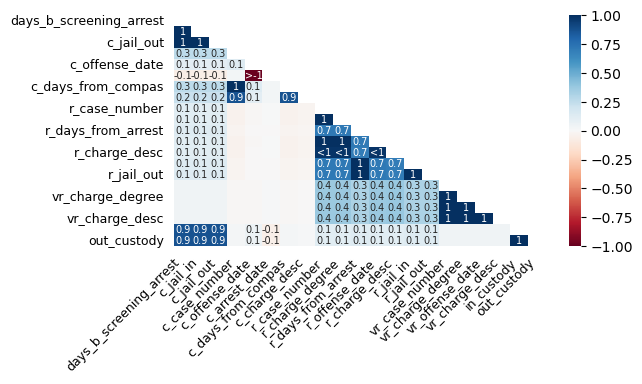

----------------------------------------------------------------------------------------------------


In [85]:
initial_exploration(df)

## Exploración Inicial